### Machine learning - Classification


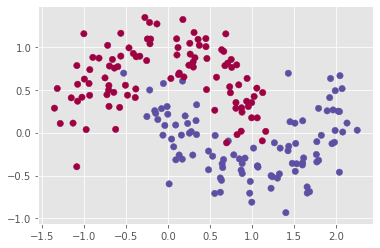

In [126]:
%matplotlib inline
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.style.use('ggplot') #makes plots look pretty

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [127]:
def plot_decision_boundary(model,X,y):
    padding=0.15
    res=0.01
    
    #max and min values of x and y of the dataset
    x_min,x_max=X[:,0].min(), X[:,0].max()
    y_min,y_max=X[:,1].min(), X[:,1].max()
    
    #range of x's and y's
    x_range=x_max-x_min
    y_range=y_max-y_min
    
    #add padding to the ranges
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    #create a meshgrid of points with the above ranges
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    #plot the contours on the grid
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    #plot the original data and labels
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

C:\Users\com\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


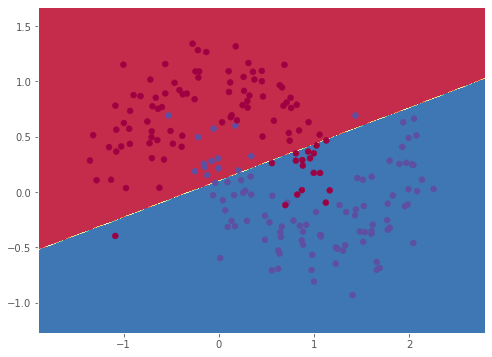

In [128]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y) 
plot_decision_boundary(model,X,y)

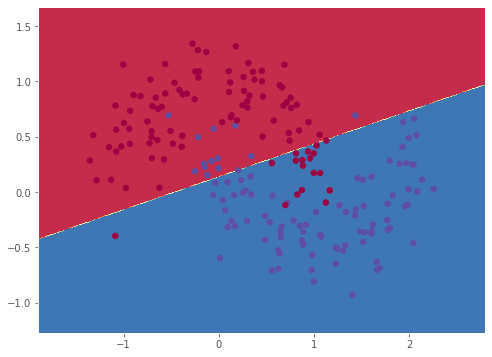

In [135]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y) 
plot_decision_boundary(model,X,y)

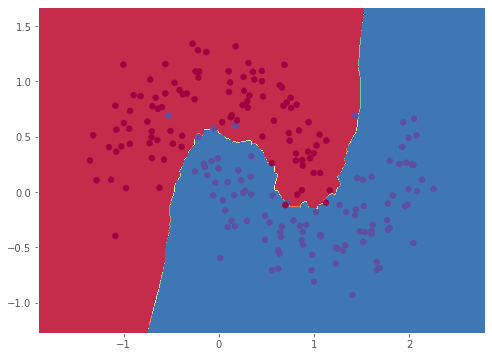

In [131]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y) 
plot_decision_boundary(model,X,y)

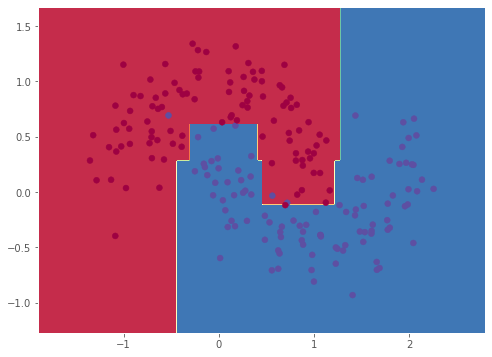

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier(min_samples_leaf=3)
model.fit(X,y)
plot_decision_boundary(model,X,y)